In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

2024-02-16 23:03:40.939051: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-16 23:03:40.939086: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-16 23:03:40.940172: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-16 23:03:40.946157: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13629092953551482926
xla_global_id: -1
]


2024-02-16 23:03:42.691043: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_COMPAT_NOT_SUPPORTED_ON_DEVICE: forward compatibility was attempted on non supported HW
2024-02-16 23:03:42.691063: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: c9bc1a2b8429
2024-02-16 23:03:42.691069: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: c9bc1a2b8429
2024-02-16 23:03:42.691108: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 545.23.6
2024-02-16 23:03:42.691125: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 535.154.5
2024-02-16 23:03:42.691130: E external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:244] kernel version 535.154.5 does not match DSO version 545.23.6 -- cannot find working devices in this configuration


In [15]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

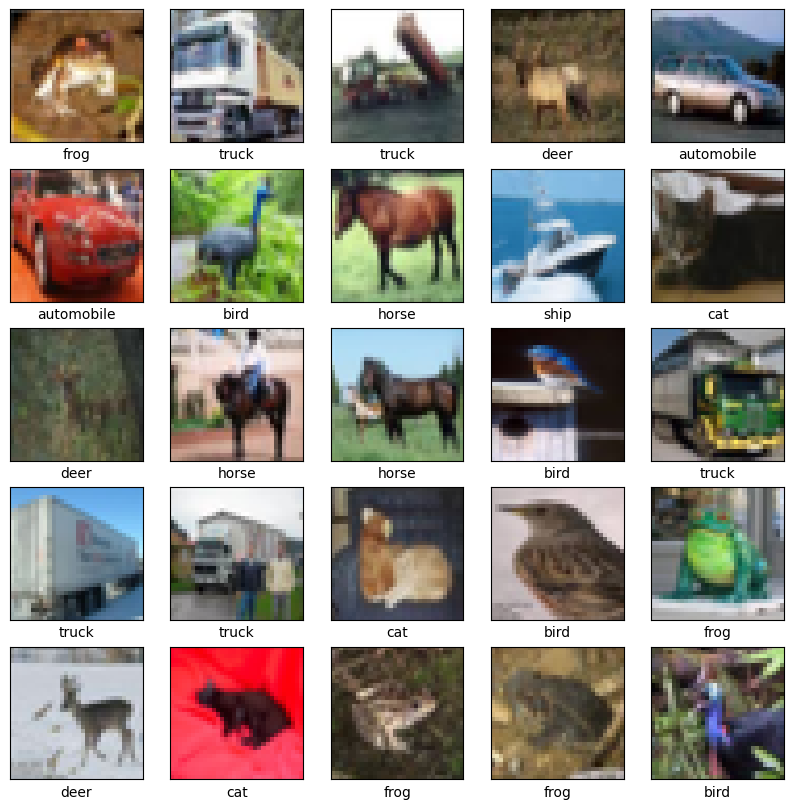

In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [17]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()
model_sdg = tf.keras.models.clone_model(model)
model_rms = tf.keras.models.clone_model(model)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.4984 - accuracy: 0.4555 - val_loss: 1.2039 - val_accuracy: 0.5611
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1284 - accuracy: 0.6034 - val_loss: 1.0681 - val_accuracy: 0.6213
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9847 - accuracy: 0.6570 - val_loss: 0.9722 - val_accuracy: 0.6611
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8996 - accuracy: 0.6832 - val_loss: 0.9877 - val_accuracy: 0.6590
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8339 - accuracy: 0.7070 - val_loss: 0.9227 - val_accuracy: 0.6850
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7771 - accuracy: 0.7285 - val_loss: 0.8800 - val_accuracy: 0.7006
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7303 - accuracy: 0.7446 - val_loss: 0.8647 - val_ac

In [19]:
model_sdg.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_sgd = model_sdg.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


model_rms.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history_rms = model_rms.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))



Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 2.0346 - accuracy: 0.2473 - val_loss: 1.8117 - val_accuracy: 0.3513
Epoch 2/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.7103 - accuracy: 0.3801 - val_loss: 1.5929 - val_accuracy: 0.4197
Epoch 3/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5111 - accuracy: 0.4543 - val_loss: 1.4497 - val_accuracy: 0.4737
Epoch 4/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3902 - accuracy: 0.5014 - val_loss: 1.4303 - val_accuracy: 0.4849
Epoch 5/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3028 - accuracy: 0.5341 - val_loss: 1.5043 - val_accuracy: 0.4612
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2276 - accuracy: 0.5651 - val_loss: 1.3569 - val_accuracy: 0.5179
Epoch 7/10
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1616 - accuracy: 0.5905 - val_loss: 1.2134 - val_ac

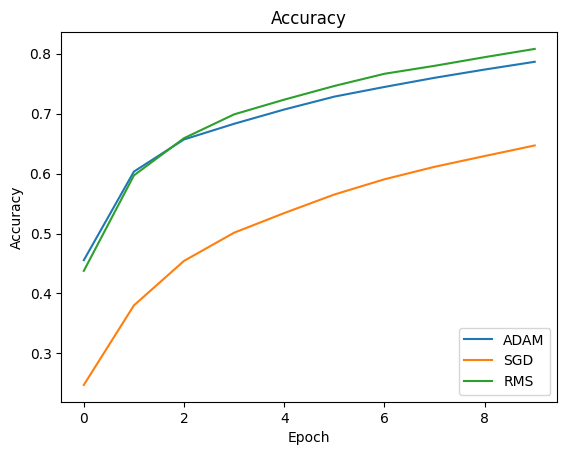

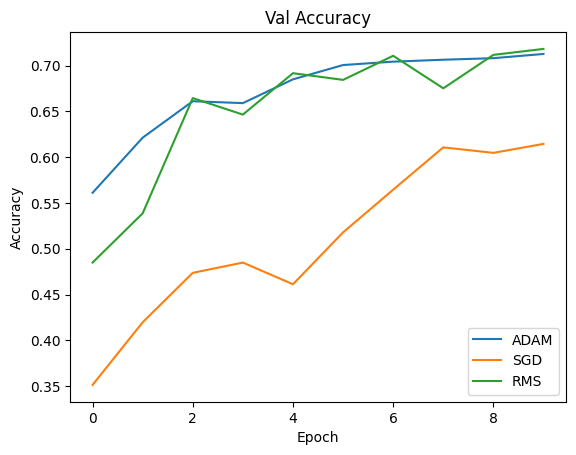

In [23]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.title('Accuracy')

plt.plot(history.history['accuracy'], label='ADAM')
plt.plot(history_sgd.history['accuracy'], label='SGD')
plt.plot(history_rms.history['accuracy'], label='RMS')
plt.legend(loc='lower right')
plt.show()

plt.figure()

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
plt.title('Val Accuracy')

plt.plot(history.history['val_accuracy'], label='ADAM')
plt.plot(history_sgd.history['val_accuracy'], label='SGD')
plt.plot(history_rms.history['val_accuracy'], label='RMS')
plt.legend(loc='lower right')
plt.show()

In [45]:
vgg = tf.keras.applications.resnet50.ResNet50(
    input_shape=(32, 32, 3),
    include_top=False,
    weights='imagenet'
)
vgg.trainable = False
# vgg.summary()



inputs = tf.keras.Input(shape=(32, 32, 3))

vgg_inputs = tf.keras.applications.vgg16.preprocess_input(inputs)

feature_batch = vgg(vgg_inputs)
print(feature_batch.shape)

dense_1 = layers.Dense(512, activation='relu')
activation_1 = dense_1(feature_batch)
dense_2 = layers.Dense(64, activation='relu')
activation_2 = dense_2(activation_1)
dense_3 = layers.Dense(10)
activation_3 = dense_3(activation_2)

vgg_model = tf.keras.Model(inputs, activation_3)
vgg_model.summary(expand_nested=True)



vgg_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

vgg_history = vgg_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# # plt.ylim([0.5, 1])
# plt.title('Accuracy')

# plt.plot(history.history['accuracy'], label='ADAM')
# plt.legend(loc='lower right')
# plt.show()


(None, 1, 1, 2048)
Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_26 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 tf.__operators__.getitem_2  (None, 32, 32, 3)         0         
  (SlicingOpLambda)                                              
                                                                 
 tf.nn.bias_add_2 (TFOpLamb  (None, 32, 32, 3)         0         
 da)                                                             
                                                                 
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| input_25 (InputLayer)      [(None, 32, 32, 3)]       0        |
|                                                               |
| conv1_pad (ZeroPadding2D)  (None, 38, 

KeyboardInterrupt: 

In [48]:
vgg = tf.keras.applications.resnet50.ResNet50(
    input_shape=(32, 32, 3),
    include_top=True,
    classes=10,
    weights=None
)
inputs = tf.keras.Input(shape=(32, 32, 3))
vgg_inputs = tf.keras.applications.vgg16.preprocess_input(inputs)
outputs = vgg(vgg_inputs)
vgg_model = tf.keras.Model(inputs, outputs)
vgg_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
vgg_history = vgg_model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1389/1563 [=========================>....] - ETA: 3:38 - loss: 2.2928 - accuracy: 0.2677

KeyboardInterrupt: 

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14431227497925592620
xla_global_id: -1
]
